# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11,25

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

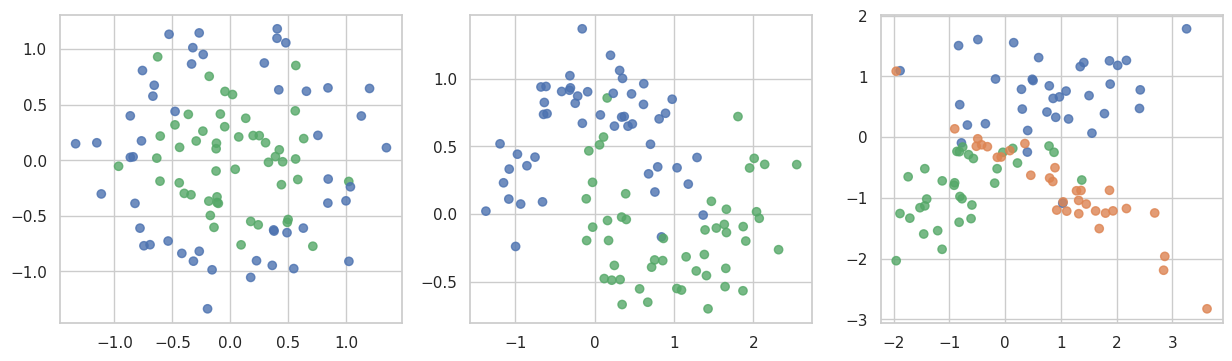

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

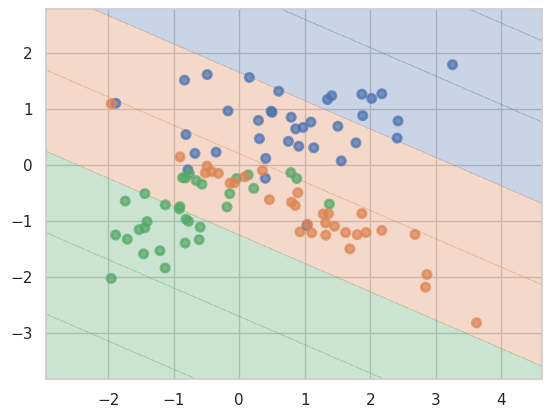

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

[{'Train Accuracy': 1.0, 'Test Accuracy': 0.7},
 {'Train Accuracy': 1.0, 'Test Accuracy': 0.95},
 {'Train Accuracy': 1.0, 'Test Accuracy': 0.7}]

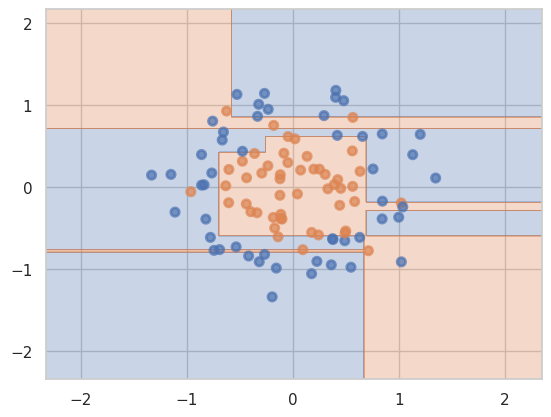

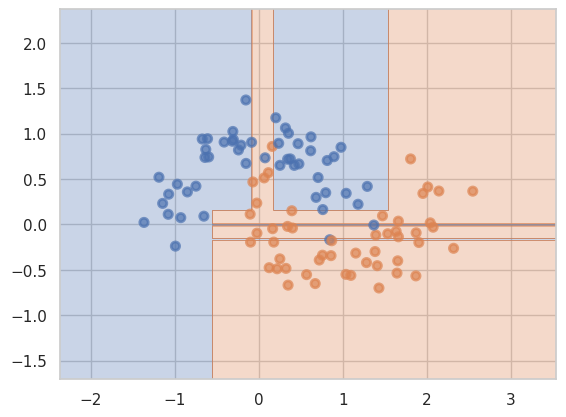

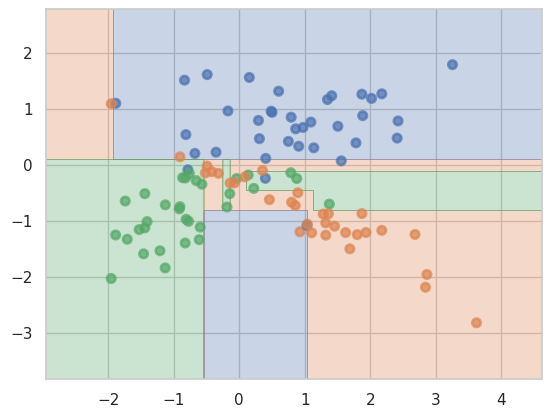

In [ ]:
from sklearn.metrics import accuracy_score
results = []
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    plt.figure()
    plot_surface(clf, X, y)

    results.append({
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })
results

__Ответ:__ мы видим, что некоторые модели действительно прилично переобучились: у них на тренировочной выборке accuracy сильно превосходит тестовые значения. Например, первое и третье деревья переобучились значительно: их accuracy упала на 30% на тестовой выборке.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [ ]:
params_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}



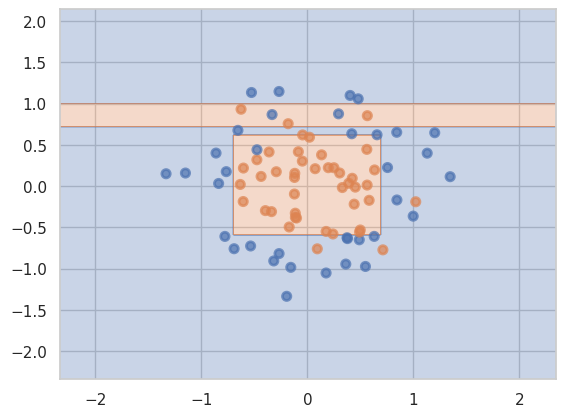

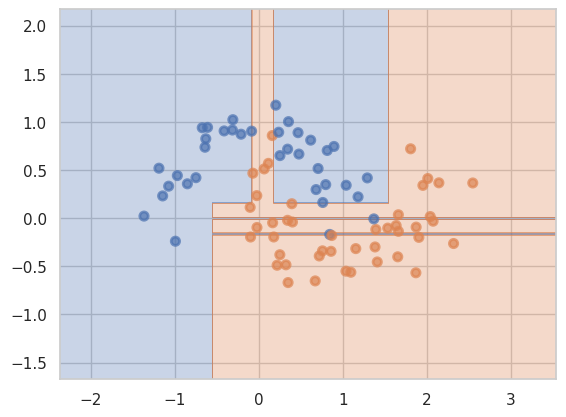

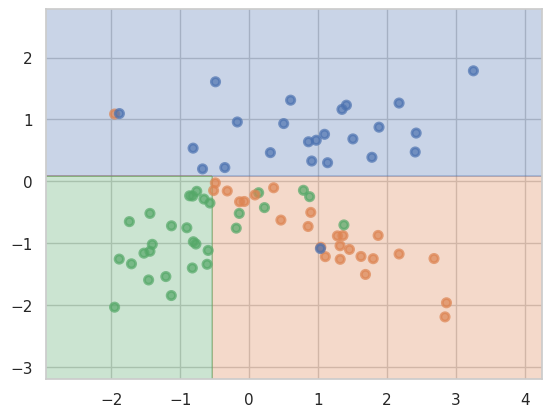

In [ ]:
from sklearn.model_selection import GridSearchCV
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(clf, params_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    plt.figure()
    plot_surface(best_model, X_train, y_train)
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
    results.append({
        "Train gridsearch Accuracy": train_accuracy,
        "Test gridsearch Accuracy": test_accuracy,
        "Best Params for gridsearch": grid_search.best_params_
    })

In [ ]:
results

[{'Train Accuracy': 1.0, 'Test Accuracy': 0.7},
 {'Train Accuracy': 1.0, 'Test Accuracy': 0.95},
 {'Train Accuracy': 1.0, 'Test Accuracy': 0.7},
 {'Train gridsearch Accuracy': 0.925,
  'Test gridsearch Accuracy': 0.75,
  'Best Params for gridsearch': {'max_depth': None, 'min_samples_leaf': 4}},
 {'Train gridsearch Accuracy': 1.0,
  'Test gridsearch Accuracy': 0.95,
  'Best Params for gridsearch': {'max_depth': None, 'min_samples_leaf': 1}},
 {'Train gridsearch Accuracy': 0.8875,
  'Test gridsearch Accuracy': 0.75,
  'Best Params for gridsearch': {'max_depth': 3, 'min_samples_leaf': 2}}]

__Ответ:__ после подбора оптимальных парамтеров, мы немного пожертвовали accuracy на тренировочном семпле данных, зато значительно увеличили ее на тестовой выборке. При этом обобщающая способность выросла, потому что модель перестала зацикливаться на шуме в тренировочных данных и научилась выделять более общие паттерны поведения данных для более эффективного разделения их на тестовой выборке.

Для датасетов с двумя классами можно выделить следующую закономерность: наилучшие результаты достигаются, когда параметры `max_depth` и `min_samples_leaf` имеют достаточно большие значения. Если глубина дерева (`max_depth`) слишком мала, модель оказывается недообученной и показывает низкую точность как на обучающей, так и на тестовой выборках. При увеличении глубины и небольшом значении `min_samples_leaf` возникает переобучение. Модель демонстрирует хорошую способность к обобщению только тогда, когда оба параметра имеют достаточно большие значения. При этом для данных с большим количеством классов требуется более высокая глубина дерева, поэтому оптимальное значение `max_depth` для задач с тремя классами будет больше. Однако взаимосвязь между этими двумя параметрами сохраняется неизменной.

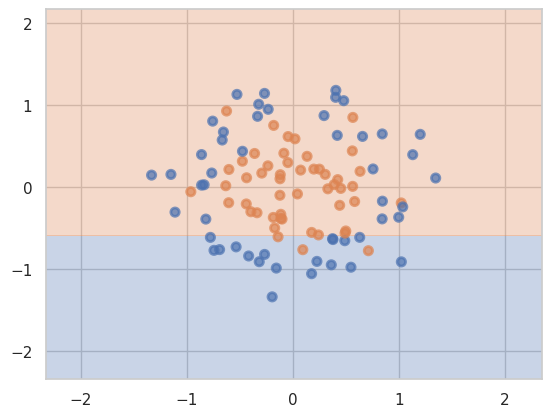

max_depth: 1, min_samples_leaf: 1
Accurcay-test равен 0.4666666666666667
Accurcay-train равен 0.7285714285714285
Датасет 1


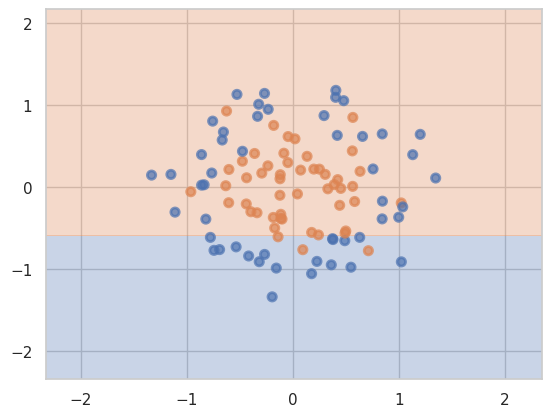

max_depth: 1, min_samples_leaf: 6
Accurcay-test равен 0.4666666666666667
Accurcay-train равен 0.7285714285714285
Датасет 2


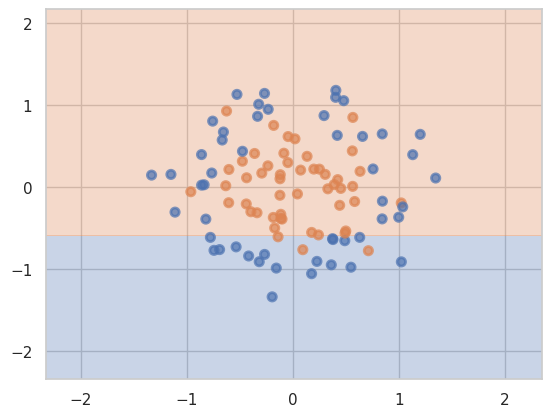

max_depth: 1, min_samples_leaf: 11
Accurcay-test равен 0.4666666666666667
Accurcay-train равен 0.7285714285714285
Датасет 3


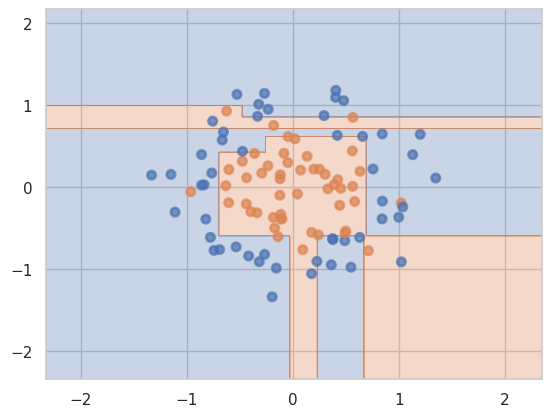

max_depth: 6, min_samples_leaf: 1
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 1.0
Датасет 4


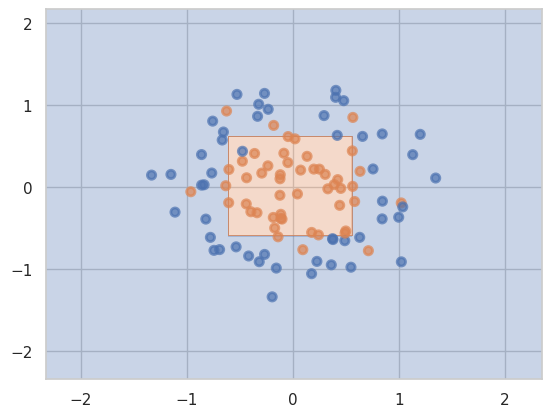

max_depth: 6, min_samples_leaf: 6
Accurcay-test равен 0.9
Accurcay-train равен 0.8428571428571429
Датасет 5


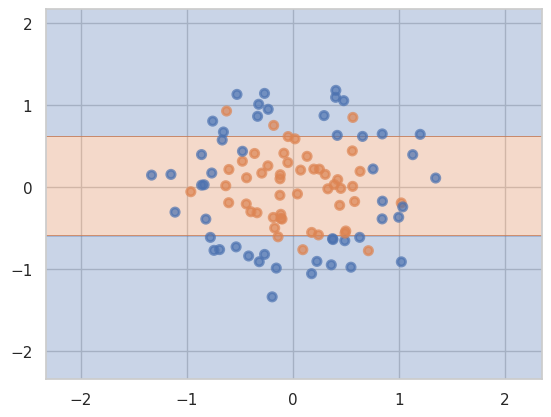

max_depth: 6, min_samples_leaf: 11
Accurcay-test равен 0.6666666666666666
Accurcay-train равен 0.8142857142857143
Датасет 6


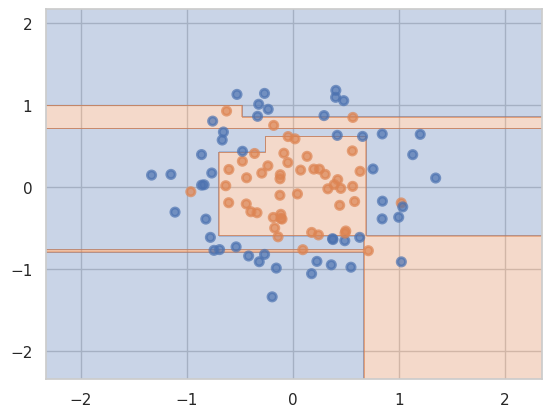

max_depth: 11, min_samples_leaf: 1
Accurcay-test равен 0.8
Accurcay-train равен 1.0
Датасет 7


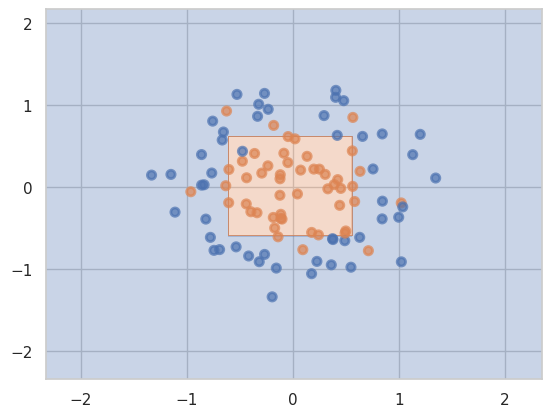

max_depth: 11, min_samples_leaf: 6
Accurcay-test равен 0.9
Accurcay-train равен 0.8428571428571429
Датасет 8


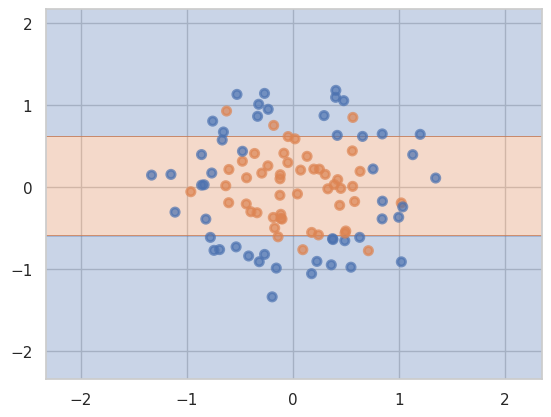

max_depth: 11, min_samples_leaf: 11
Accurcay-test равен 0.6666666666666666
Accurcay-train равен 0.8142857142857143
Датасет 9


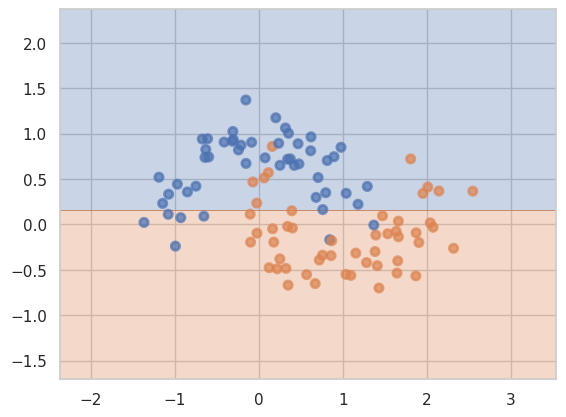

max_depth: 1, min_samples_leaf: 1
Accurcay-test равен 0.8
Accurcay-train равен 0.8428571428571429
Датасет 10


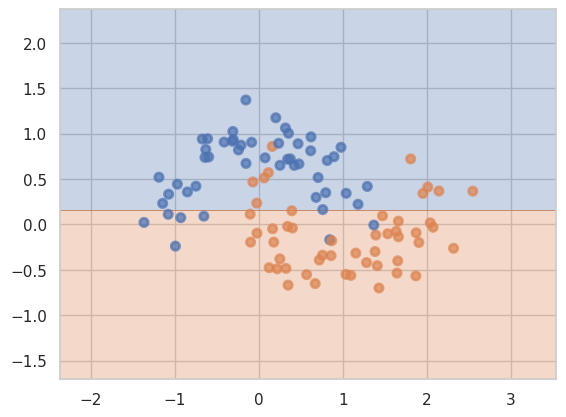

max_depth: 1, min_samples_leaf: 6
Accurcay-test равен 0.8
Accurcay-train равен 0.8428571428571429
Датасет 11


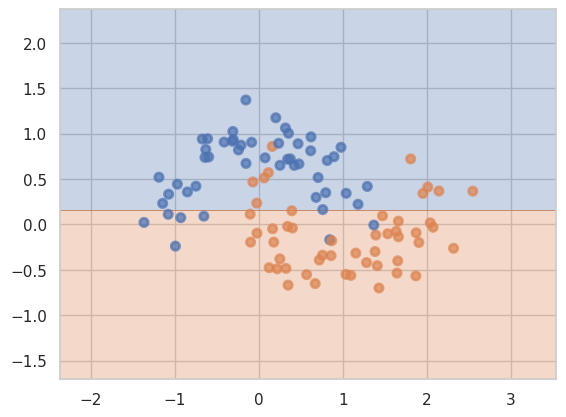

max_depth: 1, min_samples_leaf: 11
Accurcay-test равен 0.8
Accurcay-train равен 0.8428571428571429
Датасет 12


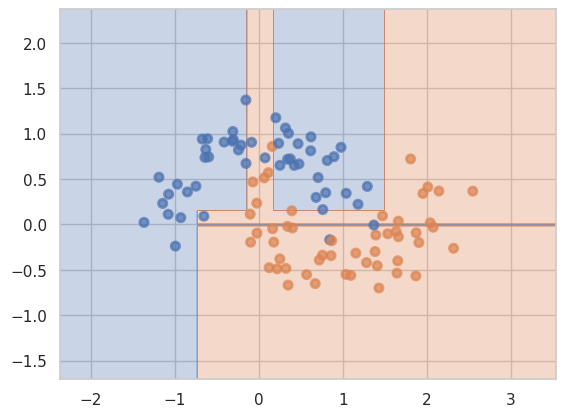

max_depth: 6, min_samples_leaf: 1
Accurcay-test равен 0.8666666666666667
Accurcay-train равен 1.0
Датасет 13


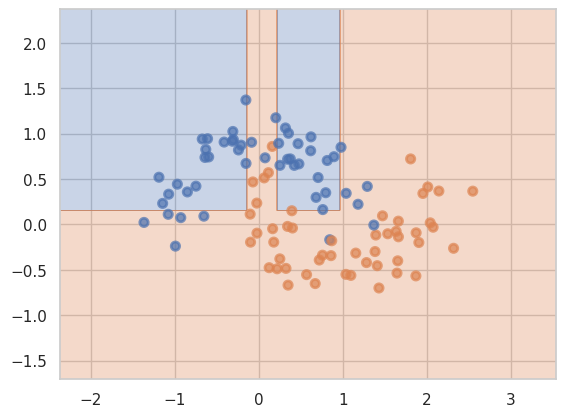

max_depth: 6, min_samples_leaf: 6
Accurcay-test равен 0.7
Accurcay-train равен 0.9285714285714286
Датасет 14


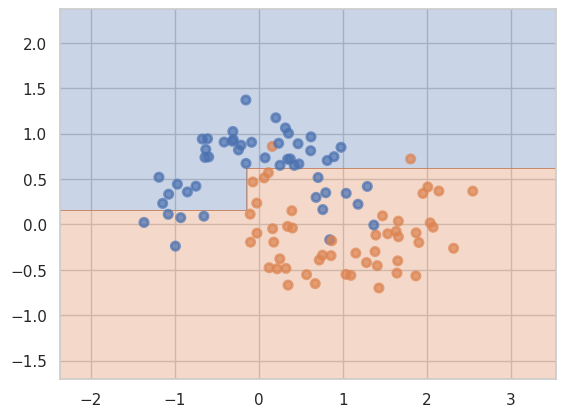

max_depth: 6, min_samples_leaf: 11
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8714285714285714
Датасет 15


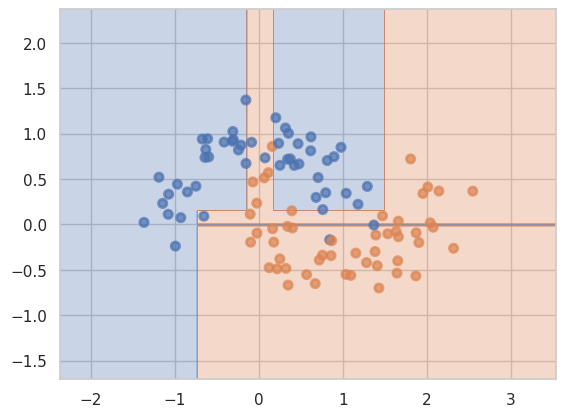

max_depth: 11, min_samples_leaf: 1
Accurcay-test равен 0.8666666666666667
Accurcay-train равен 1.0
Датасет 16


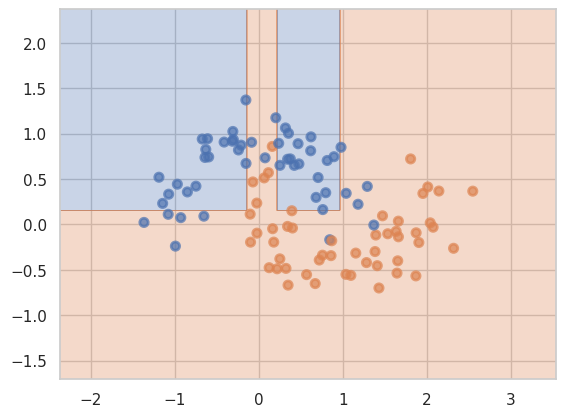

max_depth: 11, min_samples_leaf: 6
Accurcay-test равен 0.7
Accurcay-train равен 0.9285714285714286
Датасет 17


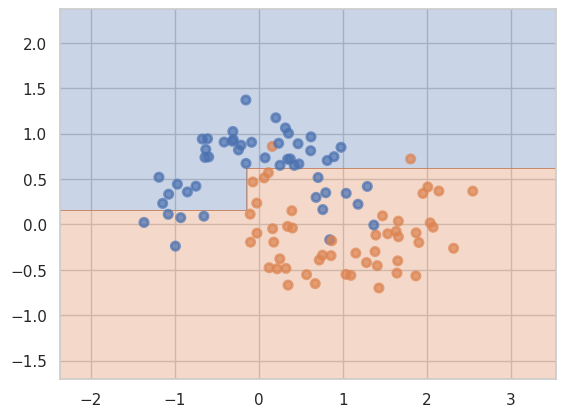

max_depth: 11, min_samples_leaf: 11
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8714285714285714
Датасет 18


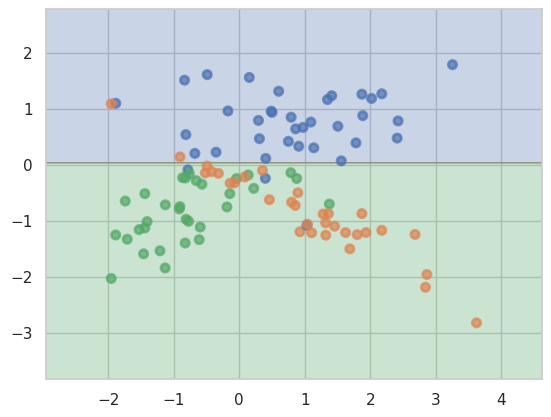

max_depth: 1, min_samples_leaf: 1
Accurcay-test равен 0.6
Accurcay-train равен 0.6714285714285714
Датасет 19


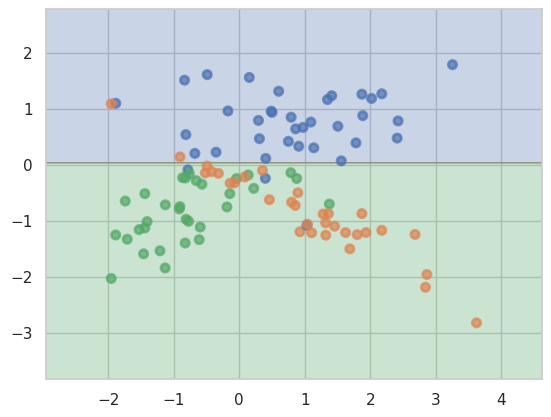

max_depth: 1, min_samples_leaf: 6
Accurcay-test равен 0.6
Accurcay-train равен 0.6714285714285714
Датасет 20


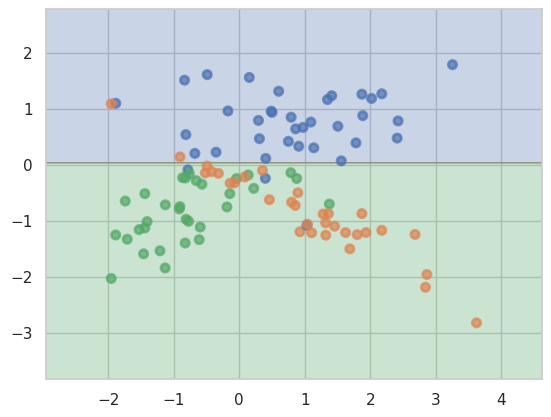

max_depth: 1, min_samples_leaf: 11
Accurcay-test равен 0.6
Accurcay-train равен 0.6714285714285714
Датасет 21


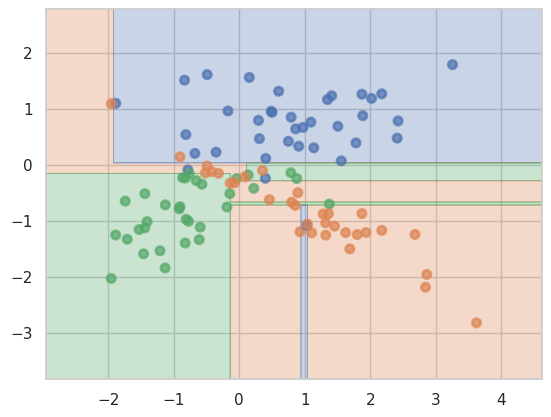

max_depth: 6, min_samples_leaf: 1
Accurcay-test равен 0.8
Accurcay-train равен 0.9857142857142858
Датасет 22


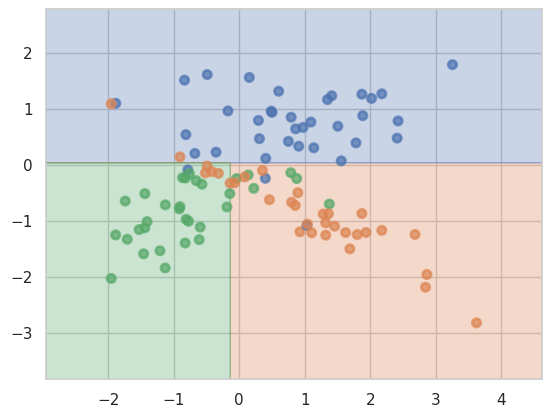

max_depth: 6, min_samples_leaf: 6
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8857142857142857
Датасет 23


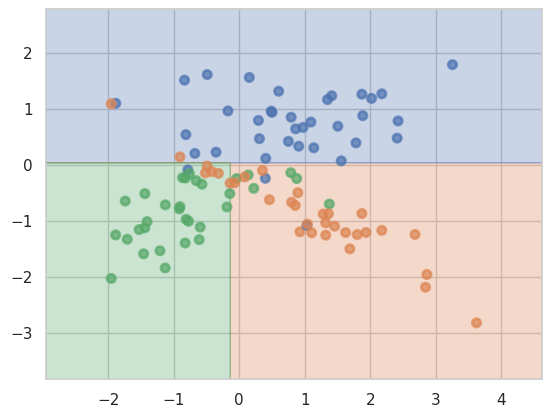

max_depth: 6, min_samples_leaf: 11
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8857142857142857
Датасет 24


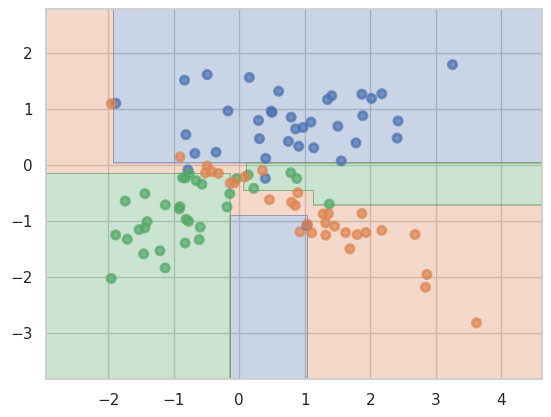

max_depth: 11, min_samples_leaf: 1
Accurcay-test равен 0.8
Accurcay-train равен 1.0
Датасет 25


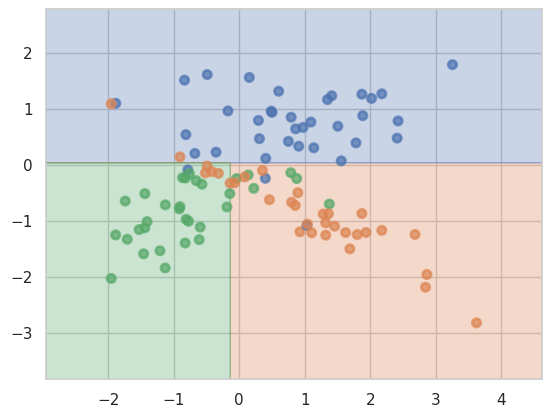

max_depth: 11, min_samples_leaf: 6
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8857142857142857
Датасет 26


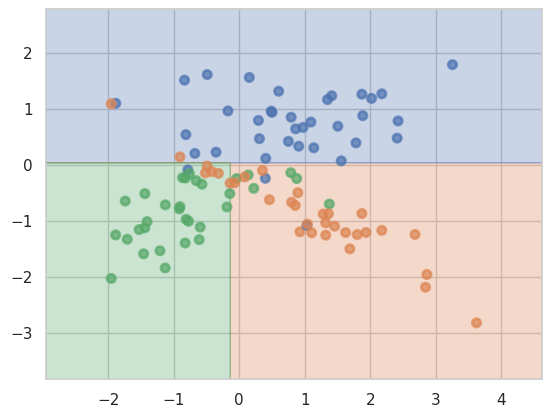

max_depth: 11, min_samples_leaf: 11
Accurcay-test равен 0.7666666666666667
Accurcay-train равен 0.8857142857142857
Датасет 27


In [ ]:
counter = 1
for X, y in datasets:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  for i in range(1, 16, 5):
      for j in range(1, 16, 5):
          dec_tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)
          dec_tree.fit(X_train, y_train)
          y_pred_test = dec_tree.predict(X_test)
          accuracy_test = accuracy_score(y_test, y_pred_test)
          y_pred_train = dec_tree.predict(X_train)
          accuracy_train = accuracy_score(y_train, y_pred_train)
          plot_surface(dec_tree, X, y)
          plt.show()
          print(f'max_depth: {i}, min_samples_leaf: {j}')
          print(f'Accurcay-test равен {accuracy_test}')
          print(f'Accurcay-train равен {accuracy_train}')
          print(f'Датасет {counter}')
          counter+=1

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Посылка в контесте: 129725623

Итак, этот шедевр не мог получиться без помощи от искусственного интеллекта за неимением собственного. На вход GPT получил следующий промпт (мотайте на ус, я своего рода гений промпт-инжиниринга):

"сейчас очень внимательно

представь что ты лектор по машинному обучению

твой студент должен был написать код для вот этой функции

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """

    его код выглядит так


где-то закралась ошибка. найди ее и объясни студенту, как ее исправить

sorted_indices = np.argsort(feature_vector)
  feature_vector_sorted = feature_vector[sorted_indices]
  target_vector_sorted = target_vector[sorted_indices]
  thresholds = (np.unique(feature_vector_sorted[1:]) +
  np.unique(feature_vector_sorted[:-1])) / 2
  cumsum_left = np.cumsum(target_vector_sorted)
  cumsum_right = np.cumsum(target_vector_sorted[::-1])[::-1]
  left_counts = cumsum_left[:-1]
  right_counts = cumsum_right[1:]
  total_left_counts = np.arange(1, len(feature_vector_sorted)) total_right_counts = len(feature_vector_sorted) - total_left_counts
  p_left = left_counts / total_left_counts p_right = right_counts / total_right_counts
  h_l = 1 - p_left**2 - (1 - p_left)**2
  h_r = 1 - p_right**2 - (1 - p_right)**2
  ginis = -(total_left_counts / len(feature_vector_sorted)) * h_l - (total_right_counts / len(feature_vector_sorted)) * h_r
  indexes = (np.cumsum(np.unique(feature_vector, return_counts = True) [1]) - 1)[:-1]
  ginis = ginis[indexes]
  index_best = np.argmax(ginis)
  threshold_best = thresholds[index_best]
  gini_best = ginis[index_best]
  thresholds
    pass #это код который получил гпт

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('students.csv')
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


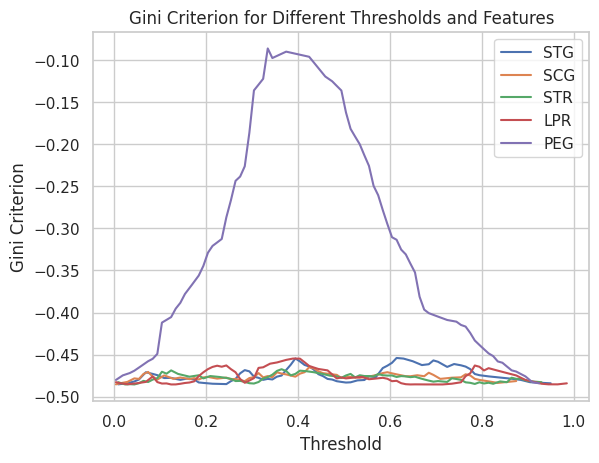

In [ ]:
from hw5code import find_best_split
for feature in data.columns[:-1]:
    feature_vector = data[feature].values
    target_vector = data["UNS"].values
    thresholds, ginis, _, _ = find_best_split(feature_vector, target_vector)
    plt.plot(thresholds, ginis, label=feature)
plt.xlabel("Threshold")
plt.ylabel("Gini Criterion")
plt.title("Gini Criterion for Different Thresholds and Features")
plt.legend()
plt.show()

In [ ]:
target = data['UNS']
data.pop('UNS')

,UNS
0,0
1,1
2,0
3,1
4,0
...,...
253,1
254,1
255,1
256,1


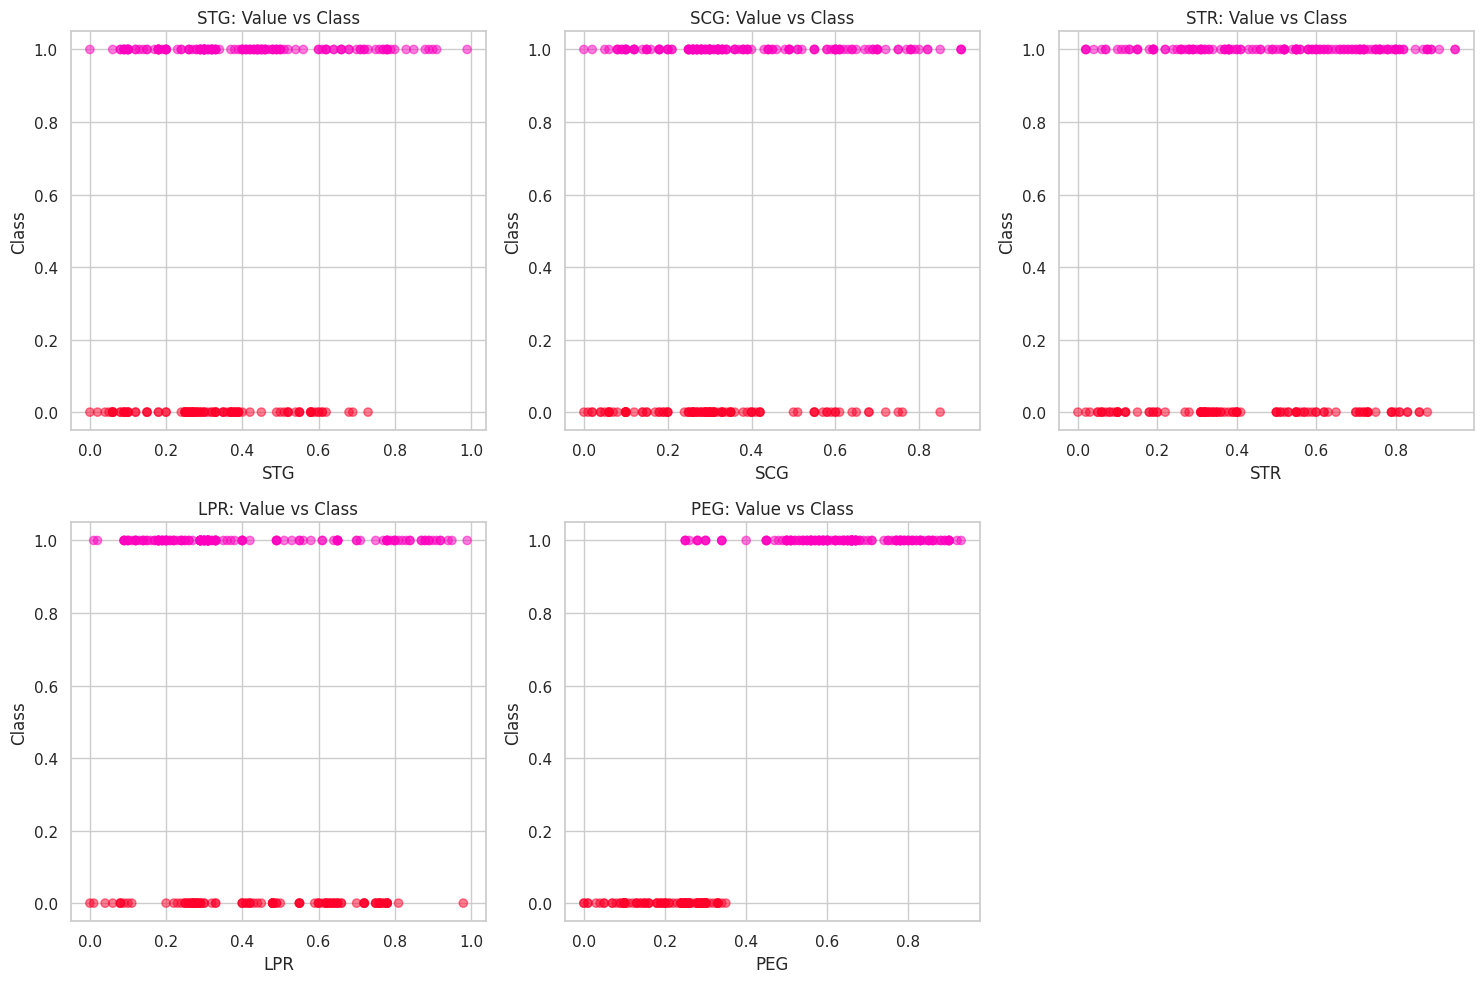

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(data.shape[1]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data.iloc[:, i], target, alpha=0.5, c=target, cmap='gist_rainbow')
    plt.title(f'{data.columns[i]}: Value vs Class')
    plt.xlabel(data.columns[i])
    plt.ylabel('Class')

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Для начала следует отметить, что деления по признаку PEG необходимо производить исходя из кривых значений критерия Джини, так как именно этот признак демонстрирует максимальное значение критерия. Это согласуется с анализом scatter-графиков, на которых также видно, что можно провести условную линию, разделяющую классы по параметру PEG.

У хороших для разделения признаков четко прослеживается граница, позволяющая разделить данные на два подкласса. В отличие от этого, у неэффективных признаков провести такую границу крайне сложно, поскольку они представлены одинаково независимо от выбранной границы. Примером такого неудачного признака является SCG.


__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Посылка в контесте: 129724483

In [ ]:
def _fit_node(self, sub_X, sub_y, node):
    if np.all(sub_y == sub_y[0]):  #не тот критерий останова
        node["type"] = "terminal"
        node["class"] = sub_y[0]
        return

    feature_best, threshold_best, gini_best, split = None, None, None, None
    for feature in range(sub_X.shape[1]):  #не та длина
        feature_type = self._feature_types[feature]
        categories_map = {}

        if feature_type == "real":
            feature_vector = sub_X[:, feature]
        elif feature_type == "categorical":
            counts = Counter(sub_X[:, feature])
            clicks = Counter(sub_X[sub_y == 1, feature])
            ratio = {}
            for key, current_count in counts.items():
                current_click = clicks.get(key, 0)
                ratio[key] = current_click / current_count
            sorted_categories = [x[0] for x in sorted(ratio.items(), key=lambda x: x[1])]
            categories_map = {cat: idx for idx, cat in enumerate(sorted_categories)}

            feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
        else:
            raise ValueError("Unknown feature type")

        if len(np.unique(feature_vector)) < 2:
            continue

        _, _, threshold, gini = find_best_split(feature_vector, sub_y)
        if gini_best is None or gini > gini_best:
            feature_best = feature
            gini_best = gini
            split = feature_vector < threshold

            if feature_type == "real":
                threshold_best = threshold
            elif feature_type == "categorical":
                threshold_best = [k for k, v in categories_map.items() if v < threshold]
            else:
                raise ValueError("Unknown feature type")

    if feature_best is None:
        node["type"] = "terminal"
        node["class"] = Counter(sub_y).most_common(1)[0][0]  #вот тут были траблы с классами
        return

    node["type"] = "nonterminal"
    node["feature_split"] = feature_best
    if self._feature_types[feature_best] == "real":
        node["threshold"] = threshold_best
    elif self._feature_types[feature_best] == "categorical":
        node["categories_split"] = threshold_best
    else:
        raise ValueError("Unknown feature type")

    node["left_child"], node["right_child"] = {}, {}
    self._fit_node(sub_X[split], sub_y[split], node["left_child"])
    self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])  #а тут не та маска для ветки дерева


__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if len(sub_y) == 0:
            node["type"] = "terminal"
            node["class"] = None
            return

        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key in counts:
                    current_click = clicks.get(key, 0)
                    ratio[key] = current_click / counts[key]
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, range(len(sorted_categories))))
                feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError("Unknown feature type")

            if len(np.unique(feature_vector)) < 2:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [key for key in categories_map if categories_map[key] < threshold]

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] if len(sub_y) > 0 else None
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError("Unknown feature type")
        left_split_indices = split.nonzero()[0]
        right_split_indices = (~split).nonzero()[0]
        if len(left_split_indices) > 0:
            node["left_child"] = {}
            self._fit_node(sub_X[left_split_indices], sub_y[left_split_indices], node["left_child"])
        if len(right_split_indices) > 0:
            node["right_child"] = {}
            self._fit_node(sub_X[right_split_indices], sub_y[right_split_indices], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_split = node["feature_split"]
        if self._feature_types[feature_split] == "real":
            if x[feature_split] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif self._feature_types[feature_split] == "categorical":
            if x[feature_split] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            raise ValueError("Unknown feature type")

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


In [ ]:
import numpy as np
def find_best_split(feature_vector, target_vector):
    if len(feature_vector) == 0:
        return [], [], None, None
    sorted_indices = np.argsort(feature_vector)
    feature_vector_sorted = feature_vector[sorted_indices]
    target_vector_sorted = target_vector[sorted_indices]
    thresholds = (feature_vector_sorted[1:] + feature_vector_sorted[:-1]) / 2
    cumsum_left = np.cumsum(target_vector_sorted)
    left_counts = cumsum_left[:-1]
    total_left_counts = np.arange(1, len(feature_vector_sorted))
    total_right_counts = len(feature_vector_sorted) - total_left_counts
    right_counts = cumsum_left[-1] - cumsum_left[:-1]
    p_left = left_counts / total_left_counts
    p_right = right_counts / total_right_counts
    h_l = 1 - p_left**2 - (1 - p_left)**2
    h_r = 1 - p_right**2 - (1 - p_right)**2
    ginis = -(total_left_counts / len(feature_vector_sorted)) * h_l - \
            (total_right_counts / len(feature_vector_sorted)) * h_r
    indexes = np.where(feature_vector_sorted[1:] != feature_vector_sorted[:-1])[0]
    ginis = ginis[indexes]
    thresholds = thresholds[indexes]

    index_best = np.argmax(ginis)
    threshold_best = thresholds[index_best]
    gini_best = ginis[index_best]

    return thresholds, ginis, threshold_best, gini_best

In [ ]:
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('agaricus-lepiota.data', delimiter=',')
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
feature_types = ["categorical"] * (X_train.shape[1])
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)

In [ ]:
predictions = tree.predict(X_test)
accuracy = np.mean(predictions == y_test)
accuracy

1.0

__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

In [ ]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if len(sub_y) < self._min_samples_leaf:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] if len(sub_y) > 0 else None
            return

        if self._max_depth is not None and depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] if len(sub_y) > 0 else None
            return

        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key in counts:
                    current_click = clicks.get(key, 0)
                    ratio[key] = current_click / counts[key]
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, range(len(sorted_categories))))
                feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError("Unknown feature type")

            if len(np.unique(feature_vector)) < 2:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [key for key in categories_map if categories_map[key] < threshold]

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] if len(sub_y) > 0 else None
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError("Unknown feature type")

        left_split_indices = split.nonzero()[0]
        right_split_indices = (~split).nonzero()[0]

        if len(left_split_indices) > 0:
            node["left_child"] = {}
            self._fit_node(sub_X[left_split_indices], sub_y[left_split_indices], node["left_child"], depth + 1)
        if len(right_split_indices) > 0:
            node["right_child"] = {}
            self._fit_node(sub_X[right_split_indices], sub_y[right_split_indices], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_split = node["feature_split"]
        if self._feature_types[feature_split] == "real":
            if x[feature_split] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif self._feature_types[feature_split] == "categorical":
            if x[feature_split] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            raise ValueError("Unknown feature type")

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)



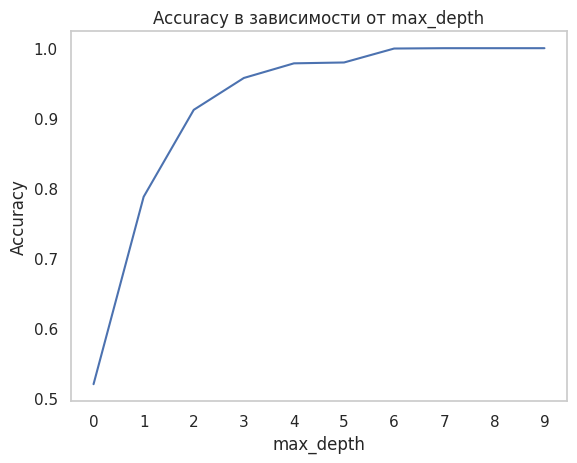

In [ ]:
accuracies = []

for k in range(10):
    feature_types = ['real'] * X_train.shape[1]
    model = DecisionTree(feature_types, max_depth=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
plt.title('Accuracy в зависимости от max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.plot(range(10), accuracies)
plt.xticks(range(10))
plt.grid()
plt.show()


In [ ]:
def evaluate_model(max_depths, min_samples_splits, min_samples_leaves):
    results = []

    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leaves:
                # Создание и обучение модели
                model = DecisionTree(feature_types=["categorical"] * X_train_ttt.shape[1],
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf)
                model.fit(X_train_ttt.to_numpy(), y_train_ttt.to_numpy())

                # Оценка качества предсказания
                predictions = model.predict(X_test_ttt.to_numpy())
                accuracy = np.mean(predictions == y_test_ttt.to_numpy())

                results.append((max_depth, min_samples_split, min_samples_leaf, accuracy))

    return results


In [ ]:
def gini_impurity(y):
    if len(y) == 0:
        return 0
    else:
        counts = np.array(list(Counter(y).values()))
        fractions = counts / float(len(y))
        return 1 - np.sum(fractions ** 2)

def find_best_split(feature_vector, target, feature_type):
    best_gini = float('inf')
    best_thresh = None
    unique_values = np.unique(feature_vector)

    for thresh in unique_values:
        if feature_type == "real":
            split_mask = feature_vector < thresh
        else:
            split_mask = feature_vector == thresh
        gini_left = gini_impurity(target[split_mask])
        gini_right = gini_impurity(target[~split_mask])
        weighted_gini = (np.sum(split_mask) * gini_left + np.sum(~split_mask) * gini_right) / len(target)

        if weighted_gini < best_gini:
            best_gini = weighted_gini
            best_thresh = thresh

    return best_gini, best_thresh

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth):
        if len(sub_y) < self._min_samples_split or len(np.unique(sub_y)) == 1:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if self._max_depth is not None and depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, float("inf"), None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            feature_vector = sub_X.iloc[:, feature]
            gini, threshold = find_best_split(feature_vector, sub_y, feature_type)

            if gini < gini_best:
                feature_best = feature
                threshold_best = threshold
                gini_best = gini
                if feature_type == "real":
                    split = feature_vector < threshold
                else:
                    split = feature_vector == threshold

        if feature_best is None or (self._min_samples_leaf is not None and
                                    (np.sum(split) < self._min_samples_leaf or
                                     np.sum(~split) < self._min_samples_leaf)):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        node["threshold"] = threshold_best
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_value = x[node["feature_split"]]
        if self._feature_types[node["feature_split"]] == "real":
            if feature_value < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if feature_value == node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree, 0)

    def predict(self, X):
        predicted = []
        for i in range(X.shape[0]):
            predicted.append(self._predict_node(X.iloc[i, :], self._tree))
        return np.array(predicted)


In [ ]:
file_path_tic_tac_toe = 'https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv'
tic_tac_toe = pd.read_csv(file_path_tic_tac_toe)
for column in tic_tac_toe.columns:
    tic_tac_toe[column] = LabelEncoder().fit_transform(tic_tac_toe[column])
X_tic_tac_toe = tic_tac_toe.drop(tic_tac_toe.columns[-1], axis=1)
y_tic_tac_toe = tic_tac_toe[tic_tac_toe.columns[-1]]

X_train_ttt, X_test_ttt, y_train_ttt, y_test_ttt = train_test_split(X_tic_tac_toe, y_tic_tac_toe, test_size=0.5, random_state=42)
tic_tac_toe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [ ]:
def evaluate_decision_tree_accuracy(tree_class, X_train, y_train, X_test, y_test, param_name, param_values):
    accuracies = []
    for value in param_values:
        model_params = {param_name: value, 'feature_types': ['categorical'] * X_train.shape[1]}
        tree_model = tree_class(**model_params)
        tree_model.fit(X_train, y_train)
        predictions = tree_model.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        accuracies.append(accuracy)
    return accuracies

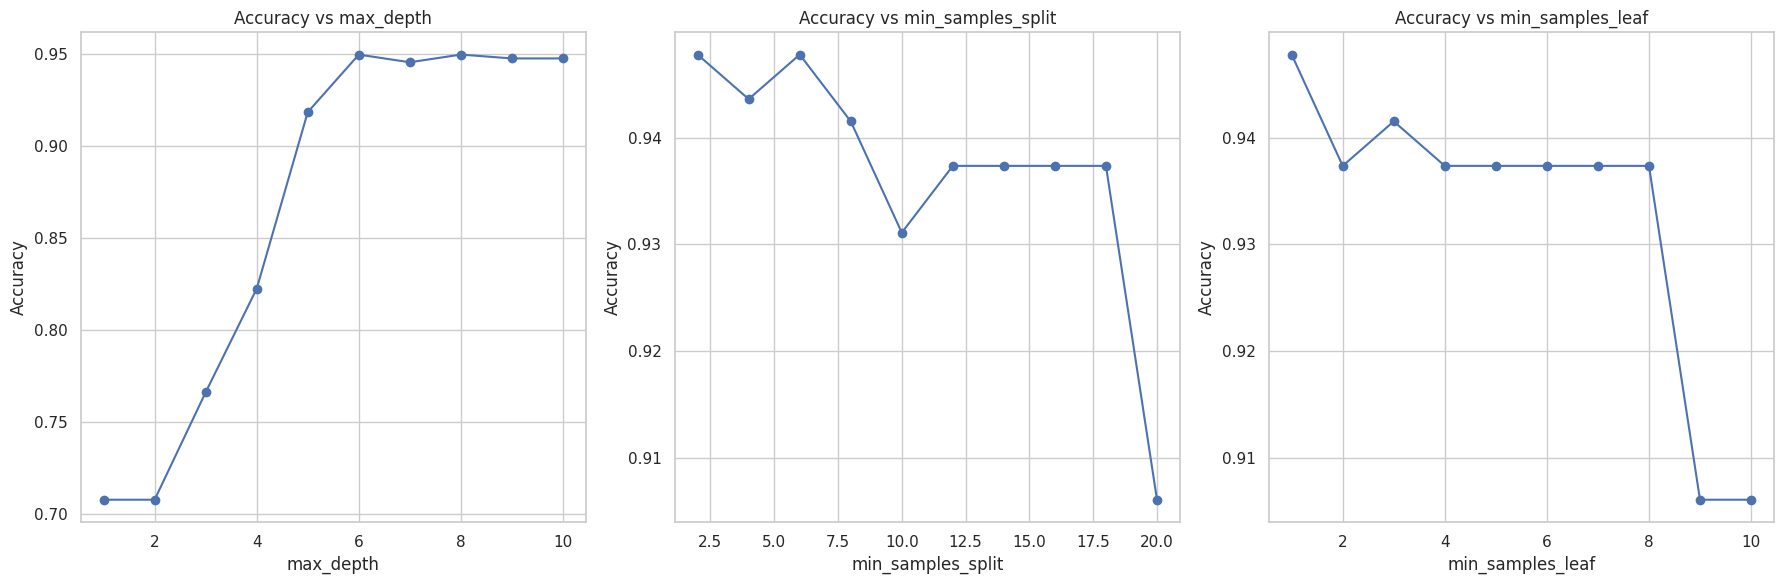

In [ ]:

max_depth_values = range(1, 11)
accuracies_depth = evaluate_decision_tree_accuracy(DecisionTree, X_train_ttt, y_train_ttt, X_test_ttt, y_test_ttt, 'max_depth', max_depth_values)
min_samples_split_values = range(2, 21, 2)
accuracies_split = evaluate_decision_tree_accuracy(DecisionTree, X_train_ttt, y_train_ttt, X_test_ttt, y_test_ttt, 'min_samples_split', min_samples_split_values)
min_samples_leaf_values = range(1, 11)
accuracies_leaf = evaluate_decision_tree_accuracy(DecisionTree, X_train_ttt, y_train_ttt, X_test_ttt, y_test_ttt, 'min_samples_leaf', min_samples_leaf_values)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(max_depth_values, accuracies_depth, marker='o')
plt.title('Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(min_samples_split_values, accuracies_split, marker='o')
plt.title('Accuracy vs min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 3)
plt.plot(min_samples_leaf_values, accuracies_leaf, marker='o')
plt.title('Accuracy vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

промпт смотри ниже

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


def find_best_split(X, y, loss_function=mean_squared_error, quantiles=10):
    """
    Найти оптимальное разбиение для текущего узла.
    Перебирает пороги по квантилям каждого признака.

    Args:
        X (np.ndarray): Матрица признаков.
        y (np.ndarray): Целевая переменная.
        loss_function (function): Функция ошибки (MSE или MAE).
        quantiles (int): Количество квантилей для поиска порогов.

    Returns:
        best_threshold: Лучший порог.
        best_split: Информация о разбиении (маски, модели и т.д.).
    """
    best_loss = float("inf")
    best_threshold = None
    best_split = None

    n_features = X.shape[1]

    for feature in range(n_features):
        thresholds = np.quantile(X[:, feature], np.linspace(0, 1, quantiles + 1)[1:-1])

        for threshold in thresholds:
            left_mask = X[:, feature] <= threshold
            right_mask = ~left_mask

            if np.sum(left_mask) < 2 or np.sum(right_mask) < 2:
                continue
            model_left = LinearRegression().fit(X[left_mask], y[left_mask])
            model_right = LinearRegression().fit(X[right_mask], y[right_mask])
            y_pred_left = model_left.predict(X[left_mask])
            y_pred_right = model_right.predict(X[right_mask])
            loss_left = loss_function(y[left_mask], y_pred_left)
            loss_right = loss_function(y[right_mask], y_pred_right)
            total_loss = (len(y[left_mask]) / len(y)) * loss_left + (len(y[right_mask]) / len(y)) * loss_right
            if total_loss < best_loss:
                best_loss = total_loss
                best_threshold = threshold
                best_split = (feature, left_mask, right_mask, model_left, model_right)

    return best_threshold, best_split


class LinearRegressionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, loss_function=mean_squared_error):
        """
        Класс линейного дерева регрессии.

        Args:
            max_depth (int): Максимальная глубина дерева.
            min_samples_split (int): Минимальное количество выборок для разбиения.
            min_samples_leaf (int): Минимальное количество выборок в листьях.
            loss_function (function): Функция потерь (MSE или MAE).
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.loss_function = loss_function
        self.tree = {}

    def _fit_node(self, X, y, node, depth):
        """
        Рекурсивная функция для построения дерева.

        Args:
            X (np.ndarray): Матрица признаков.
            y (np.ndarray): Целевая переменная.
            node (dict): Узел дерева.
            depth (int): Текущая глубина.
        """

        if len(y) < self.min_samples_split or len(np.unique(y)) == 1 or \
                (self.max_depth is not None and depth >= self.max_depth):
            node["type"] = "terminal"
            node["model"] = LinearRegression().fit(X, y)
            return
        best_threshold, best_split = find_best_split(X, y, loss_function=self.loss_function)

        if best_threshold is None or np.sum(best_split[1]) < self.min_samples_leaf or np.sum(best_split[2]) < self.min_samples_leaf:
            node["type"] = "terminal"
            node["model"] = LinearRegression().fit(X, y)
            return


        feature, left_mask, right_mask, model_left, model_right = best_split
        node["type"] = "split"
        node["feature"] = feature
        node["threshold"] = best_threshold
        node["left"] = {}
        node["right"] = {}
        node["models"] = (model_left, model_right)

        self._fit_node(X[left_mask], y[left_mask], node["left"], depth + 1)
        self._fit_node(X[right_mask], y[right_mask], node["right"], depth + 1)

    def fit(self, X, y):
        """
        Обучение дерева.

        Args:
            X (np.ndarray): Матрица признаков.
            y (np.ndarray): Целевая переменная.
        """
        self.tree = {}
        self._fit_node(np.array(X), np.array(y), self.tree, depth=0)

    def _predict_node(self, x, node):
        """
        Рекурсивное предсказание для одной точки.

        Args:
            x (np.ndarray): Точка данных.
            node (dict): Узел дерева.

        Returns:
            float: Предсказанное значение.
        """
        if node["type"] == "terminal":
            return node["model"].predict([x])[0]
        else:
            if x[node["feature"]] <= node["threshold"]:
                return self._predict_node(x, node["left"])
            else:
                return self._predict_node(x, node["right"])

    def predict(self, X):
        """
        Предсказание для нескольких точек.

        Args:
            X (np.ndarray): Матрица признаков.

        Returns:
            np.ndarray: Массив предсказаний.
        """
        return np.array([self._predict_node(x, self.tree) for x in X])


__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [ ]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))


In [ ]:
tree = LinearRegressionTree(max_depth=3, min_samples_split=10, min_samples_leaf=5)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.01229744404843352

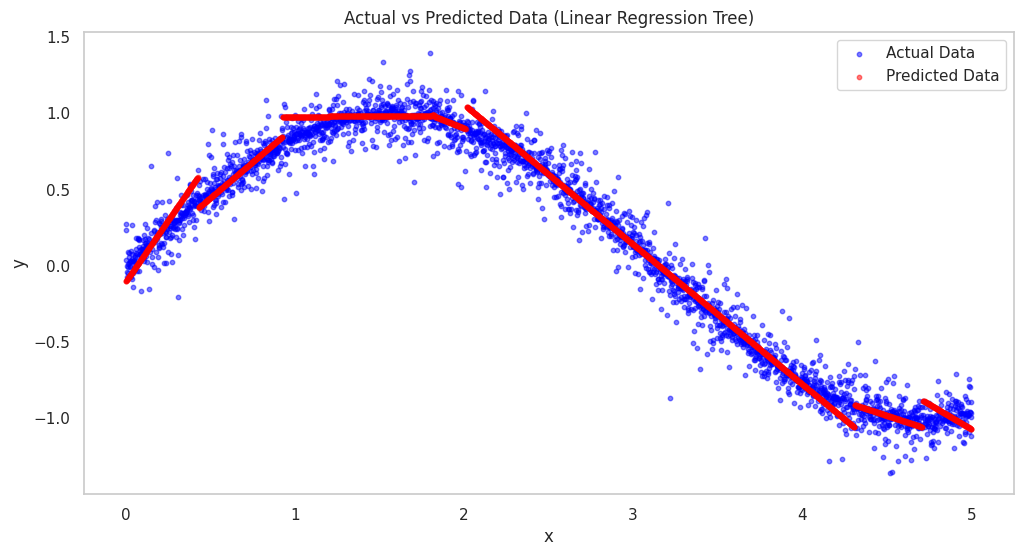

In [ ]:
y_pred_test = tree.predict(x_test)

plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, label="Actual Data", alpha=0.5, s=10, color="blue")
plt.scatter(x_test, y_pred_test, label="Predicted Data", alpha=0.5, s=10, color="red")
plt.title("Actual vs Predicted Data (Linear Regression Tree)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Здесь юзался чат гпт с промптом: "

у меня такая проблема. смотри я написала такой код (там дальше код моего изначального дерева из контеста) вот это задание (текст задания) мне нужно чтобы ты смог написать идеальный код для примера студентам.  попробуй довести до идеала"

Best Parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1}


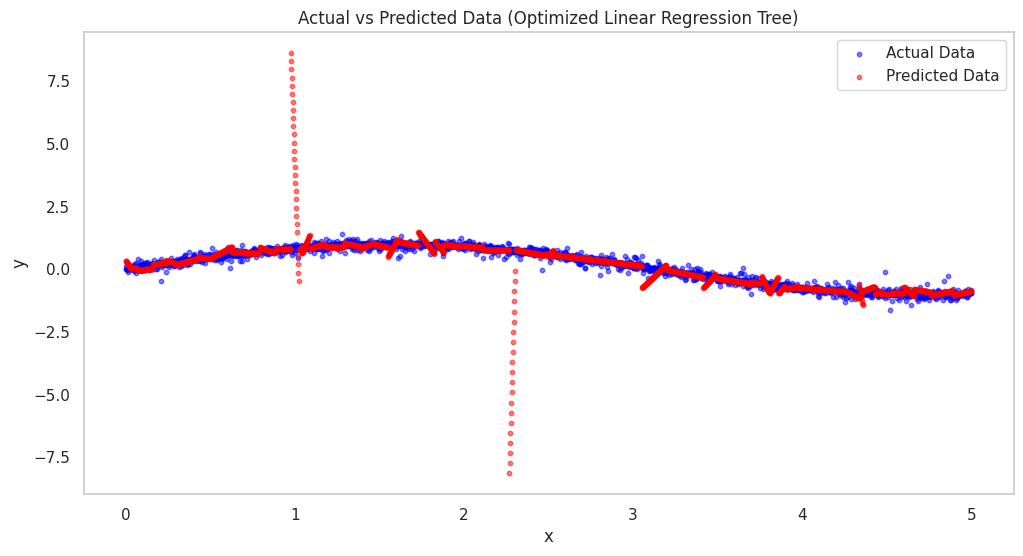

In [ ]:

class LinearRegressionTreeOptimizer:
    def __init__(self):
        self.best_params_ = None
        self.best_model_ = None

    def fit(self, X, y, param_grid):
        best_score = float('inf')
        best_params = None

        for max_depth in param_grid.get('max_depth', [None]):
            for min_samples_split in param_grid.get('min_samples_split', [2]):
                for min_samples_leaf in param_grid.get('min_samples_leaf', [1]):
                    lrt = LinearRegressionTree(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf
                    )
                    lrt.fit(X, y)
                    y_pred = lrt.predict(X)
                    mse = np.mean((y - y_pred) ** 2)
                    if mse < best_score:
                        best_score = mse
                        best_params = {
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf
                        }
                        self.best_model_ = lrt

        self.best_params_ = best_params
        return self

    def predict(self, X):
        return self.best_model_.predict(X)

n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}


optimizer = LinearRegressionTreeOptimizer()
optimizer.fit(x_train, y_train, param_grid)
print("Best Parameters:", optimizer.best_params_)
y_pred_test = optimizer.predict(x_test)

plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, label="Actual Data", alpha=0.5, s=10, color="blue")
plt.scatter(x_test, y_pred_test, label="Predicted Data", alpha=0.5, s=10, color="red")
plt.title("Actual vs Predicted Data (Optimized Linear Regression Tree)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


**Ответ:** Из плюсов: меньше переобучается, хорошо интерпретируется и достаточно универсально; из минусов- долго (очень) обучается, тяжело обрабатывать разные типы данных